In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Création du graphe #

### 1.1. Liste des arrêtes ###

In [3]:
### Paramètres : p est une distribution "jouet" pour éviter les éléments nuls dans le calcul de l'entropie croisée

N = 10 # nombre d'individus
max_fr = 5 # nombre maximum de voisins par individu
p = np.array([0.2, 0.3, 0.1, 0.2, 0.2]) # probabilité d'avoir i amis, 0 <= i <= max_fr-1

In [4]:
### Simulation du nombre de voisins par individu

verts = np.random.choice(max_fr, N, p=p)
print(verts)

[4 1 1 3 3 0 0 1 0 3]


In [5]:
### Création de la liste des associations
# Entrée : nombre de voisins par individu
# Sorite : liste des associations sans les boucles et multiples affectations

def assoc(ver):
    # Création d'une liste intermédiaire où le nombre d'occurrences de l'individu i est son nombre de voisins
    neigh = np.array([])
    for i in range(len(ver)):
        for j in range(ver[i]):
            neigh = np.append(neigh, i)
    
    # Simulation de la liste des associations selon la méthode décrite dans l'article
    assoc = np.array([])
    while (len(neigh) > 1): # on vide la liste au maximum (reste 1 élément si longueur impaire)
        i = np.random.randint(len(neigh)) # on choisit au hasard 2 éléments
        a = neigh[i]
        neigh = np.delete(neigh, i) # qu'on enlève de la liste
        j = np.random.randint(len(neigh)) # on choisit au hasard 2 éléments
        b = neigh[j]
        neigh = np.delete(neigh, j) # qu'on enlève de la liste
        if a != b: # on n'inscrit pas l'association si c'est une boucle directe
            assoc = np.append(assoc, np.array([a, b]), axis=0)
    
    assoc = np.reshape(assoc, (-1, 2))
    assoc = np.sort(assoc) # petit tri
    assoc = [tuple(row) for row in assoc]
    assoc = np.unique(assoc, axis=0) # on vire les multiples
    
    return(assoc)

In [6]:
asso = assoc(verts)
print(asso)

[[0. 1.]
 [0. 4.]
 [2. 9.]
 [3. 9.]
 [4. 7.]
 [4. 9.]]


In [7]:
### Création de la liste des voisins
# Entrée : associations sans boucle et multiples
# Sortie : liste des voisins pour chaque individu

def neigh(asso, N=10):
    
    
    neig = []

    for i in range(N):
        n_i = np.array([])
    
        for j in range(len(asso)): # on parcourt les duos
        
            if asso[j][0] == i: # on vérifie si l'individu est dans un duo, si oui on garde son partenaire
                n_i = np.append(n_i, asso[j][1])
            elif asso[j][1] == i: 
                n_i = np.append(n_i, asso[j][0])
        
        n_i = list(n_i)
        neig.append(n_i)
    return(np.array(neig))

In [8]:
neighs = neigh(asso)
print(neighs)

[list([1.0, 4.0]) list([0.0]) list([9.0]) list([9.0])
 list([0.0, 7.0, 9.0]) list([]) list([]) list([4.0]) list([])
 list([2.0, 3.0, 4.0])]


### 1.2. Comparaison des probabilités ###

In [9]:
### Calcul du nombre de voisins effectif après associations

def N_vois(asso):
    N_vois = np.array([])
    for i in range(N):
        N_vois = np.append(N_vois, (asso == i).sum())
    return(N_vois)

In [10]:
neig = N_vois(asso)
print(neig)

[2. 1. 1. 1. 3. 0. 0. 1. 0. 3.]


In [11]:
### Calcul de la probabilité empirique de la distibution des voisins

def empirical_prob(nb_nei):
    q = np.array([])
    for i in range(len(p)):
        q = np.append(q, (nb_nei == i).sum() / len(nb_nei))
    return(q)

In [12]:
emp = empirical_prob(neig)
print(emp)

[0.3 0.4 0.1 0.2 0. ]


In [13]:
### Entropie croisée

def cross_entropy(p, q):
    assert len(p) == len(q)
    ce = 0
    for i in range(len(p)):
        ce -= p[i] * np.log(q[i])
    return(ce)

In [14]:
cross_entropy(p, p)

1.5571130980576458

In [15]:
cross_entropy(p, emp)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


inf

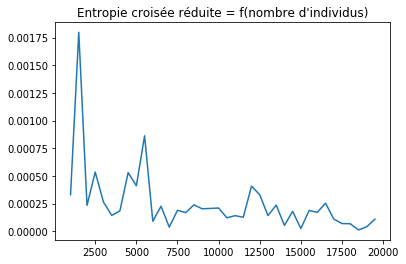

In [16]:
### Entropie croisée entre probabilités théorique et empirique en fonction de la taille de la population minus l'entropie croisée minimale

Ns = np.arange(1000, 20000, 500)
CEs = np.array([])
for N in Ns:
    verts = np.random.choice(max_fr, N, p=p)
    asso = assoc(verts)
    neig = N_vois(asso)
    emp = empirical_prob(neig)
    CEs = np.append(CEs, cross_entropy(p, emp) - cross_entropy(p, p)) # différence entre entropie croisée et entropie croisée minimale

plt.plot(Ns, CEs)
plt.title("Entropie croisée réduite = f(nombre d'individus)")
plt.show()

### 1.3. Poisson et heavy-tail ###

In [17]:
### Distribution des voisins selon la loi de Poisson

def vertsPoiss(N):
    vertsP = np.random.poisson(4, N)
    return(vertsP)

In [18]:
print(vertsPoiss(10))

[2 4 4 3 6 7 4 4 9 2]


In [19]:
### Distribution des voisins selon la loi heavy-tail 

def vertsHT(N):

    probaHT1 = np.array([])
    for i in range(N):  # il ne peut y avoir plus de voisins que d'individus
        probaHT1 = np.append(probaHT1, (i + 1)**-2.5)
        probaHT1 /= probaHT1.sum()

    a = np.random.choice(N, N, p=probaHT1)
    b = np.random.poisson(3.1, N)
    vertsHT = a + b
    return(vertsHT)

In [20]:
print(vertsHT(10))

[ 1  3  1  0  2  5  5  0 11  2]


# 2. Modèles d'épidémie #

### 2.1. Sans vaccination ###

In [21]:
### Modèle d'épidémie sur graphe sans vaccin
def epi_novac(N, asso, lbd=1, gmm=1):
    
    neig = neigh(asso, N=N)
    
    ### 0 <-> sain, 1 <-> infecté, 2 <-> rémis
    infected = np.zeros(N)
    first_infected = np.random.randint(N) # premier infecté aléatoirement
    infected[first_infected] = 1

    T = 0

    while (infected == 1).sum() > 0:


        # pour chaque individu on calcule tous les temps intéressants
        Ts = np.array([])
        for i in range(len(infected)):

            # s'il est infecté : calcul du temps de rémission et des temps d'infection
            if infected[i] == 1:

                Trem = np.random.exponential(1/gmm) # temps de rémission
                Ts = np.append(Ts, np.array([Trem, i]))

                for nei in neig[i]: 
                    if infected[int(nei)] == 0:
                        Tinf = np.random.exponential(1/lbd) # temps d'infection pour chaque voisin
                        Ts = np.append(Ts, np.array([Tinf, nei]))

        times = Ts[::2]
        pos = Ts[1::2]

        
        Tau, pTau = np.amin(times), np.argmin(times) # on garde le temps minimum

        chosen = int(pos[pTau]) # on change le statut de l'individu associé 
        if infected[chosen] == 0:
            infected[chosen] = 1 # cas d'infection
        elif infected[chosen] == 1:
            infected[chosen] = 2 # cas de rémission

        T += Tau

    return(infected)

In [22]:
N = 100

verts = vertsPoiss(N)  
# verts = vertsHT(N)
asso = assoc(verts)

infected = epi_novac(N, asso)

print("Etat final : ", infected)
print("Nombre d'infectés : ", (infected == 2).sum())

Etat final :  [0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 0. 0. 2. 0. 2. 2. 2. 0. 0. 2. 2. 2. 0. 0. 2. 2. 2. 2. 0. 2. 2. 2. 0.
 0. 2. 2. 2. 2. 0. 2. 2. 0. 2. 0. 2. 0. 0. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2.
 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 0. 0. 2. 2. 0. 2. 0. 0. 2.
 0. 2. 2. 2.]
Nombre d'infectés :  71


### 2.2. Vaccination : modèle 1 ###

In [23]:
def epi_vac1(N, asso, lbd=1, gmm=1, theta=5, rho=0.5):

    neig = neigh(asso, N=N)

    ### 0 <-> sain, 1 <-> infecté, 2 <-> rémis, 3 <-> vacciné
    infected = np.zeros(N)
    first_infected = np.random.randint(N) # premier infecté aléatoirement
    infected[first_infected] = 1

    T = 0
    while (infected == 1).sum() > 0:

        # pour chaque individu on calcule tous les temps intéressants
        Ts = np.array([])

        for i in range(len(infected)):

            # s'il est infecté : calcul des temps de rémission, de détection et d'infection
            if infected[i] == 1:
                Trem = np.random.exponential(1/gmm) # temps de rémission
                Ts = np.append(Ts, np.array([Trem, i])) 

                Tdet = np.random.exponential(1/theta) # temps de détection
                Ts = np.append(Ts, np.array([Tdet, i-N])) # astuce pour séparer temps de détection et d'infection

                for nei in neig[i]:
                    if infected[int(nei)] == 0:
                        Tinf = np.random.exponential(1/lbd) # temps d'infection pour chaque voisin
                        Ts = np.append(Ts, np.array([Tinf, nei]))

        times = Ts[::2]
        pos = Ts[1::2]

        Tau, pTau = np.amin(times), np.argmin(times) # on garde le temps minimum

        T += Tau

        chosen = int(pos[pTau])
        if chosen < 0: # cas de détection
            chosen += N
            for nei in neig[chosen]:
                if np.random.uniform(0, 1) < rho and infected[int(nei)] == 0: # vaccination avec proba rho
                    infected[int(nei)] = 3

        else:                           
            if infected[chosen] == 0:
                infected[chosen] = 1 # cas d'infection         
            elif infected[chosen] == 1:
                infected[chosen] = 2 # cas de rémission
    
    return(infected)

In [24]:
N = 100
verts = vertsPoiss(N)
# verts = vertsHT(N)
asso = assoc(verts)

infected = epi_vac1(N, asso)

print("Etat final : ", infected)
print("Nombre d'infectés : ", (infected == 2).sum())

Etat final :  [3. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0.]
Nombre d'infectés :  2


### 2.3. Vaccination : modèle 2

In [25]:
def epi_vac2(N, asso, lbd=1, gmm=1, theta=5, m=5):

    neig = neigh(asso, N=N)

    ### 0 <-> sain, 1 <-> infecté, 2 <-> rémis, 3 <-> vacciné
    infected = np.zeros(N)
    first_infected = np.random.randint(N) # premier infecté aléatoirement
    infected[first_infected] = 1
    
    n_infec = np.zeros(N) # mémoire du nombre d'infections par individu
    
    T = 0
    while (infected == 1).sum() > 0:
        
        assoc_infec = np.array([]) # liste parallèle pour garder les associations
        
        # pour chaque individu on calcule tous les temps intéressants
        Ts = np.array([])

        for i in range(len(infected)):
            
            # s'il est infecté : calcul du temps de rémission, de détection et d'infection
            if infected[i] == 1:
                Trem = np.random.exponential(1/gmm) # temps de rémission
                Ts = np.append(Ts, np.array([Trem, i]))
                
                assoc_infec = np.append(assoc_infec, [i, i]) # liste parallèle pour garder les associations

                Tdet = np.random.exponential(1/theta) # temps de détection
                Ts = np.append(Ts, np.array([Tdet, i-N]))
                
                assoc_infec = np.append(assoc_infec, [i, i]) # liste parallèle pour garder les associations
                
                for nei in neig[i]:
                    if infected[int(nei)] == 0:
                        Tinf = np.random.exponential(1/lbd) # temps d'infection pour chaque voisin
                        Ts = np.append(Ts, np.array([Tinf, nei]))
                        assoc_infec = np.append(assoc_infec, np.array([i, nei])) # liste parallèle pour garder les associations
        
        
        times = Ts[::2]
        pos = Ts[1::2]

        Tau, pTau = np.amin(times), np.argmin(times) # on garde le temps minimum

        T += Tau
        
        chosen = int(pos[pTau])
        if chosen < 0: # cas de détection
            chosen += N
            for nei in neig[chosen]:
                if infected[int(nei)] == 0: # vaccination avec proba 1
                    infected[int(nei)] = 3 
        
        else:                           
            if infected[chosen] == 0: # cas d'infection
                infected[chosen] = 1
                origin = assoc_infec[2*pTau]
                n_infec[int(origin)] += 1 # on garde l'infection en mémoire
                                       
            elif infected[chosen] == 1: # cas de rémission
                infected[chosen] = 2
        
        for i in range(len(n_infec)):
            if n_infec[i] >= m: # si trop d'infections, on vaccine les voisins
                for nei in neig[chosen]:
                    if infected[int(nei)] == 0:
                        infected[int(nei)] = 3
    
    return(infected)

In [26]:
N = 100
verts = vertsPoiss(N)
# verts = vertsHT(N)
asso = assoc(verts)

infected = epi_vac2(N, asso)

print("Etat final : ", infected)
print("Nombre d'infectés : ", (infected == 2).sum())

Etat final :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Nombre d'infectés :  1


# 3. Résultats #

### 3.1. Reproduction des résultats de l'article ###

In [27]:
N = 1000
vertsHeavyTail = vertsHT(N)
vertsPoisson = vertsPoiss(N)
assoHT = assoc(vertsHeavyTail)
assoPoiss = assoc(vertsPoisson)

In [28]:
def simul(distrib, scenario, n_sim=5, thresh_outbreak=50, theta=5, rho=0.5, m=5):
    sizes = np.array([])
    for i in range(n_sim):
        print(i)
        
        if distrib == "Poi":
            if scenario == "NO":
                infected = epi_novac(N, assoPoiss)
            elif scenario == "V1":    
                infected = epi_vac1(N, assoPoiss, theta=theta, rho=rho)
            elif scenario == "V2":
                infected = epi_vac2(N, assoPoiss, theta=theta, m=m)
            else:
                print('Scenario must be "NO" or "V1" or "V2"')
        
        elif distrib == "HT":
            if scenario == "NO":
                infected = epi_novac(N, assoHT)
            elif scenario == "V1":    
                infected = epi_vac1(N, assoHT, theta=theta, rho=rho)
            elif scenario == "V2":
                infected = epi_vac2(N, assoHT, theta=theta, m=m)
            else:
                print('Scenario must be "NO" or "V1" or "V2"')
        
        sizes = np.append(sizes, (infected == 2).sum())
        major_outbreaks = np.array([size for size in sizes if size > thresh_outbreak])
        
    plt.hist(sizes) # histogrammes des réalisations
    print("Probabilty of major outbreak : ", len(major_outbreaks)/len(sizes)) # probabilité d'un major outbreak
    if len(major_outbreaks) > 0:    
        print("Mean of major outbreaks :", np.mean(major_outbreaks)) # moyenne des infections lors d'un major outbreak

#### 3.1.1. Sans vaccination ####

0
1
2
3
4
Probabilty of major outbreak :  0.8
Mean of major outbreaks : 771.5


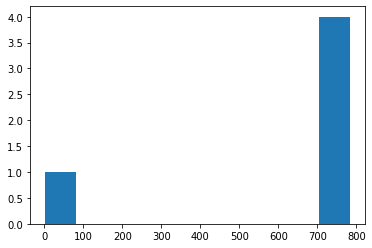

In [29]:
simul(distrib="HT", scenario="NO")

#### 3.1.2. Vaccination 1 ####

0
1
2
3
4
Probabilty of major outbreak :  0.8
Mean of major outbreaks : 454.25


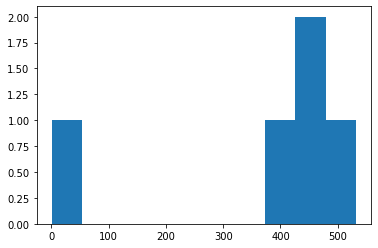

In [30]:
simul(distrib="HT", scenario="V1", theta=1)

#### 3.1.3. Vaccination 2 ####

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

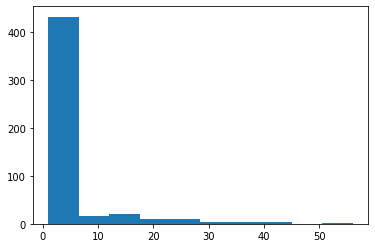

In [31]:
simul(distrib="HT", scenario="V2", n_sim=500)